# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.normal.describe()
q1_norm, q2_norm, q3_norm = np.percentile(dataframe.normal, [25, 50, 75])
round(q1_norm,3), round(q2_norm,3), round(q3_norm,3)

(17.31, 19.99, 22.684)

In [5]:
q1_norm,q2_norm, q3_norm

(17.30963787997159, 19.98962009682849, 22.68432355145866)

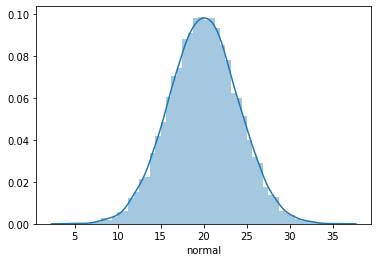

In [6]:
sns.distplot(dataframe.normal)

In [7]:
xMenos = dataframe['normal'].mean() - dataframe.normal.std()*3
xMenos

7.949907500485452

In [8]:
xMais = dataframe['normal'].mean() + dataframe.normal.std()*3
xMais

32.033004632567135

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q1_norm, q2_norm, q3_norm = np.percentile(dataframe.normal, [25, 50, 75])
    q1_binom, q2_binom, q3_binom = np.percentile(dataframe.binomial, [25, 50, 75])
    return round(q1_norm - q1_binom, 3), round(q2_norm - q2_binom, 3), round(q3_norm - q3_binom, 3)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [10]:
def q2():
    xU, xL = dataframe['normal'].mean() + dataframe['normal'].std(), dataframe['normal'].mean() - dataframe['normal'].std()
    prob = sct.norm(loc=dataframe['normal'].mean(), scale=4).cdf(xU) - sct.norm(loc=dataframe['normal'].mean(), scale=4).cdf(xL)
    prob2 = sct.norm(loc=dataframe['normal'].mean(), scale=4).cdf(xU)
    return float(round(prob, 3))

In [11]:
intervalo1 = dataframe['normal'] > dataframe['normal'].mean() - dataframe['normal'].std()
intervalo2 = dataframe['normal'] < dataframe['normal'].mean() + dataframe['normal'].std()
intervalo = dataframe[intervalo1 & intervalo2]

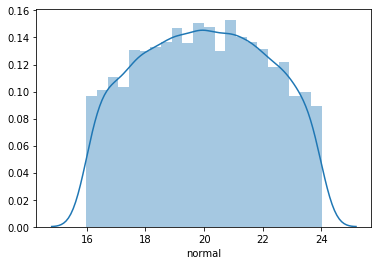

In [12]:
sns.distplot(intervalo.normal)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [15]:
def q3():
    return round(dataframe.binomial.mean() - dataframe.normal.mean(), 3), round(dataframe.binomial.var() - dataframe.normal.var(),3)


Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [16]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [17]:
stars = stars.loc[stars["target"] == 0]
stars["false_pulsar_mean_profile_standardized"] = (stars["mean_profile"]-stars["mean_profile"].mean())/stars["mean_profile"].std()
stars.false_pulsar_mean_profile_standardized.describe()

count    1.625800e+04
mean     2.355656e-16
std      1.000000e+00
min     -5.685134e+00
25%     -6.471532e-01
50%      3.985947e-02
75%      6.706549e-01
max      4.352157e+00
Name: false_pulsar_mean_profile_standardized, dtype: float64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
def q4():
    # Retorne aqui o resultado da questão 4.
    q1_teorico, q2_teorico, q3_teorico = sct.norm.ppf(0.80, loc=0, scale=1), sct.norm.ppf(0.90, loc=0, scale=1), sct.norm.ppf(0.95, loc=0, scale=1)
    ecdf = ECDF(stars.false_pulsar_mean_profile_standardized)
    return round(ecdf(q1_teorico),3), round(ecdf(q2_teorico),3), round(ecdf(q3_teorico),3)    

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [19]:
def q5():
    # Retorne aqui o resultado da questão 5.
    q1_norm, q2_norm, q3_norm = np.percentile(stars.false_pulsar_mean_profile_standardized, [25, 50, 75])
    q1_t, q2_t, q3_t = sct.norm.ppf(0.25, loc=0, scale=1), sct.norm.ppf(0.50, loc=0, scale=1), sct.norm.ppf(0.75, loc=0, scale=1)
    return round(q1_norm-q1_t, 3), round(q2_norm-q2_t, 3), round(q3_norm-q3_t, 3) 

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.